# 1. Exploratory analysis (EDA), standarization, normalization, outliers and encoding

In [1]:
# Data handling
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Standarization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy import stats

# Encoding
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

# Plots
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocessing and modeling
plt.rcParams['figure.figsize'] = (10,8)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Pepinillo
import pickle

# Warning configuration
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reads csv
df_train = pd.read_csv('../data/train.csv', index_col=0)
df_train.reset_index(drop = False, inplace = True)
df_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


### Features
- id: only for test & sample submission files, id for prediction sample identification
- price: price in USD
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour
- clarity: a measurement of how clear the diamond is
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

### Info:
- 1 carat = 200mg

In [3]:
df_density = df_train.copy()
df_density['weight'] = df_density.carat * 200 # mg
df_density['volume'] = df_density.x * df_density.y * df_density.z # mm3
df_density['volume'] = df_density['volume'] / 3 # aprox for a diamond
df_density['density'] = df_density['weight']/df_density['volume'] #mg/mm3
df_density['density'] = df_density['density'] * 1000 #kg/m3
df_density.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price,weight,volume,density
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353,60.0,16.479141,3640.966406
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183,202.0,55.850576,3616.793496
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983,144.0,38.674972,3723.338184
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371,216.0,58.380400,3699.871875
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588,72.0,19.246500,3740.939911


In [4]:
# mean density of a diamond = 3500

threshold = int(input('threshold'))/100

df_density = df_density[(df_density.density > 3500-3500 * threshold) & (df_density.density < 3500+3500 * threshold)]
df_density.drop(['weight', 'volume', 'density'], axis=1, inplace=True)
df_density

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
7,7,0.33,Ideal,E,VVS2,60.0,56.0,4.53,4.56,2.72,6.877
8,8,0.32,Very Good,E,VS2,62.9,56.0,4.36,4.39,2.75,6.554
10,10,0.63,Ideal,D,SI1,61.1,56.0,5.52,5.58,3.39,7.484
...,...,...,...,...,...,...,...,...,...,...,...
40446,40446,1.01,Premium,F,VS1,61.3,58.0,6.44,6.52,3.97,8.854
40448,40448,0.41,Premium,F,VVS2,60.6,58.0,4.79,4.84,2.92,7.017
40450,40450,0.42,Premium,D,SI2,62.1,59.0,4.78,4.82,2.98,6.551
40451,40451,0.53,Premium,G,VS2,62.0,58.0,5.21,5.18,3.22,7.382


# Exploratory analysis (EDA)

### General information:

In [5]:
df_train = df_density

In [6]:
df_train.shape

(21438, 11)

In [7]:
df_train.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21438 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       21438 non-null  int64  
 1   carat    21438 non-null  float64
 2   cut      21438 non-null  object 
 3   color    21438 non-null  object 
 4   clarity  21438 non-null  object 
 5   depth    21438 non-null  float64
 6   table    21438 non-null  float64
 7   x        21438 non-null  float64
 8   y        21438 non-null  float64
 9   z        21438 non-null  float64
 10  price    21438 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.0+ MB


In [9]:
df_train.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
id,21438.0,20213.555136,11674.305916,0.000,10011.250,20199.500,30337.750,40454.000
carat,21438.0,0.691101,0.432259,0.200,0.340,0.530,1.010,3.220
depth,21438.0,61.315099,1.259566,51.000,60.700,61.500,62.100,68.500
table,21438.0,56.789332,2.109810,49.000,55.000,56.000,58.000,95.000
x,21438.0,5.498616,1.088908,3.740,4.520,5.230,6.450,9.490
y,21438.0,5.506548,1.081985,3.710,4.530,5.240,6.450,9.420
z,21438.0,3.370763,0.651400,2.290,2.780,3.220,3.920,5.920
price,21438.0,7.572206,0.999992,5.787,6.718,7.437,8.382,9.842


In [10]:
df_train.describe(include='object').T

,count,unique,top,freq
cut,21438,5,Ideal,11893
color,21438,7,G,4582
clarity,21438,8,VS2,4886


### Nulls and duplicates:

In [11]:
df_train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [12]:
# df_train[df_train.duplicated() == True].value_counts().sum()
df_train.duplicated().sum()

0

In [13]:
df_train.drop_duplicates(inplace=True)

In [14]:
df_train.duplicated().sum()

0

## Variables:
- Response: 
    - Numeric: price
- Predict:
    - Numeric: carat, depth, table, x, y, z
    - Categoric: cut, color, clarity

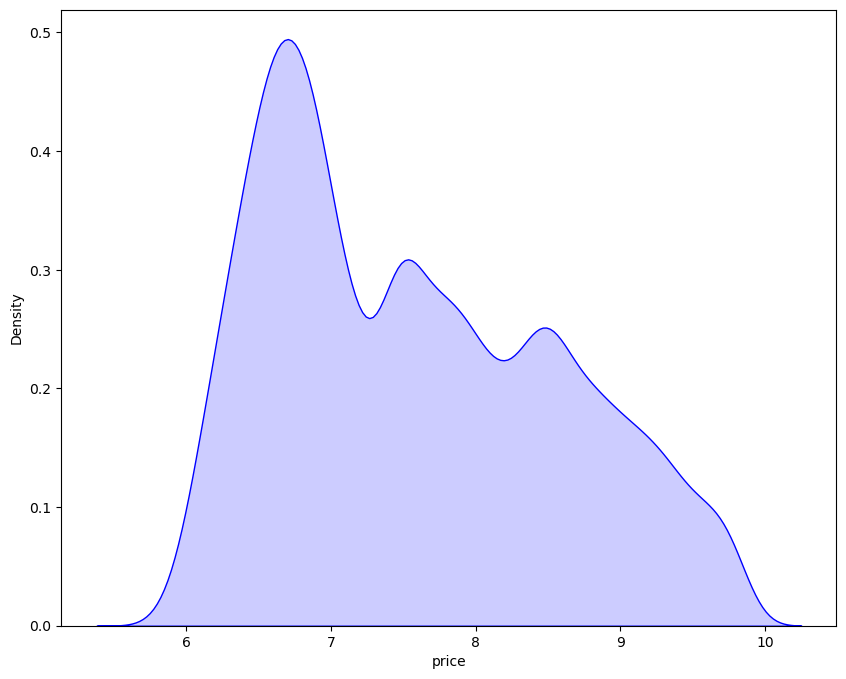

In [15]:
# Viz of the response variable

sns.kdeplot(
    df_train.price, 
    color='blue',
    fill=True,
    alpha=.2);

In [16]:
stats.shapiro(df_train['price'])
# p-value = 0 < 0.05
# Response variable doen't follow a normal distribution

ShapiroResult(statistic=0.9493638277053833, pvalue=0.0)

## Prediction variables:

#### Numeric:

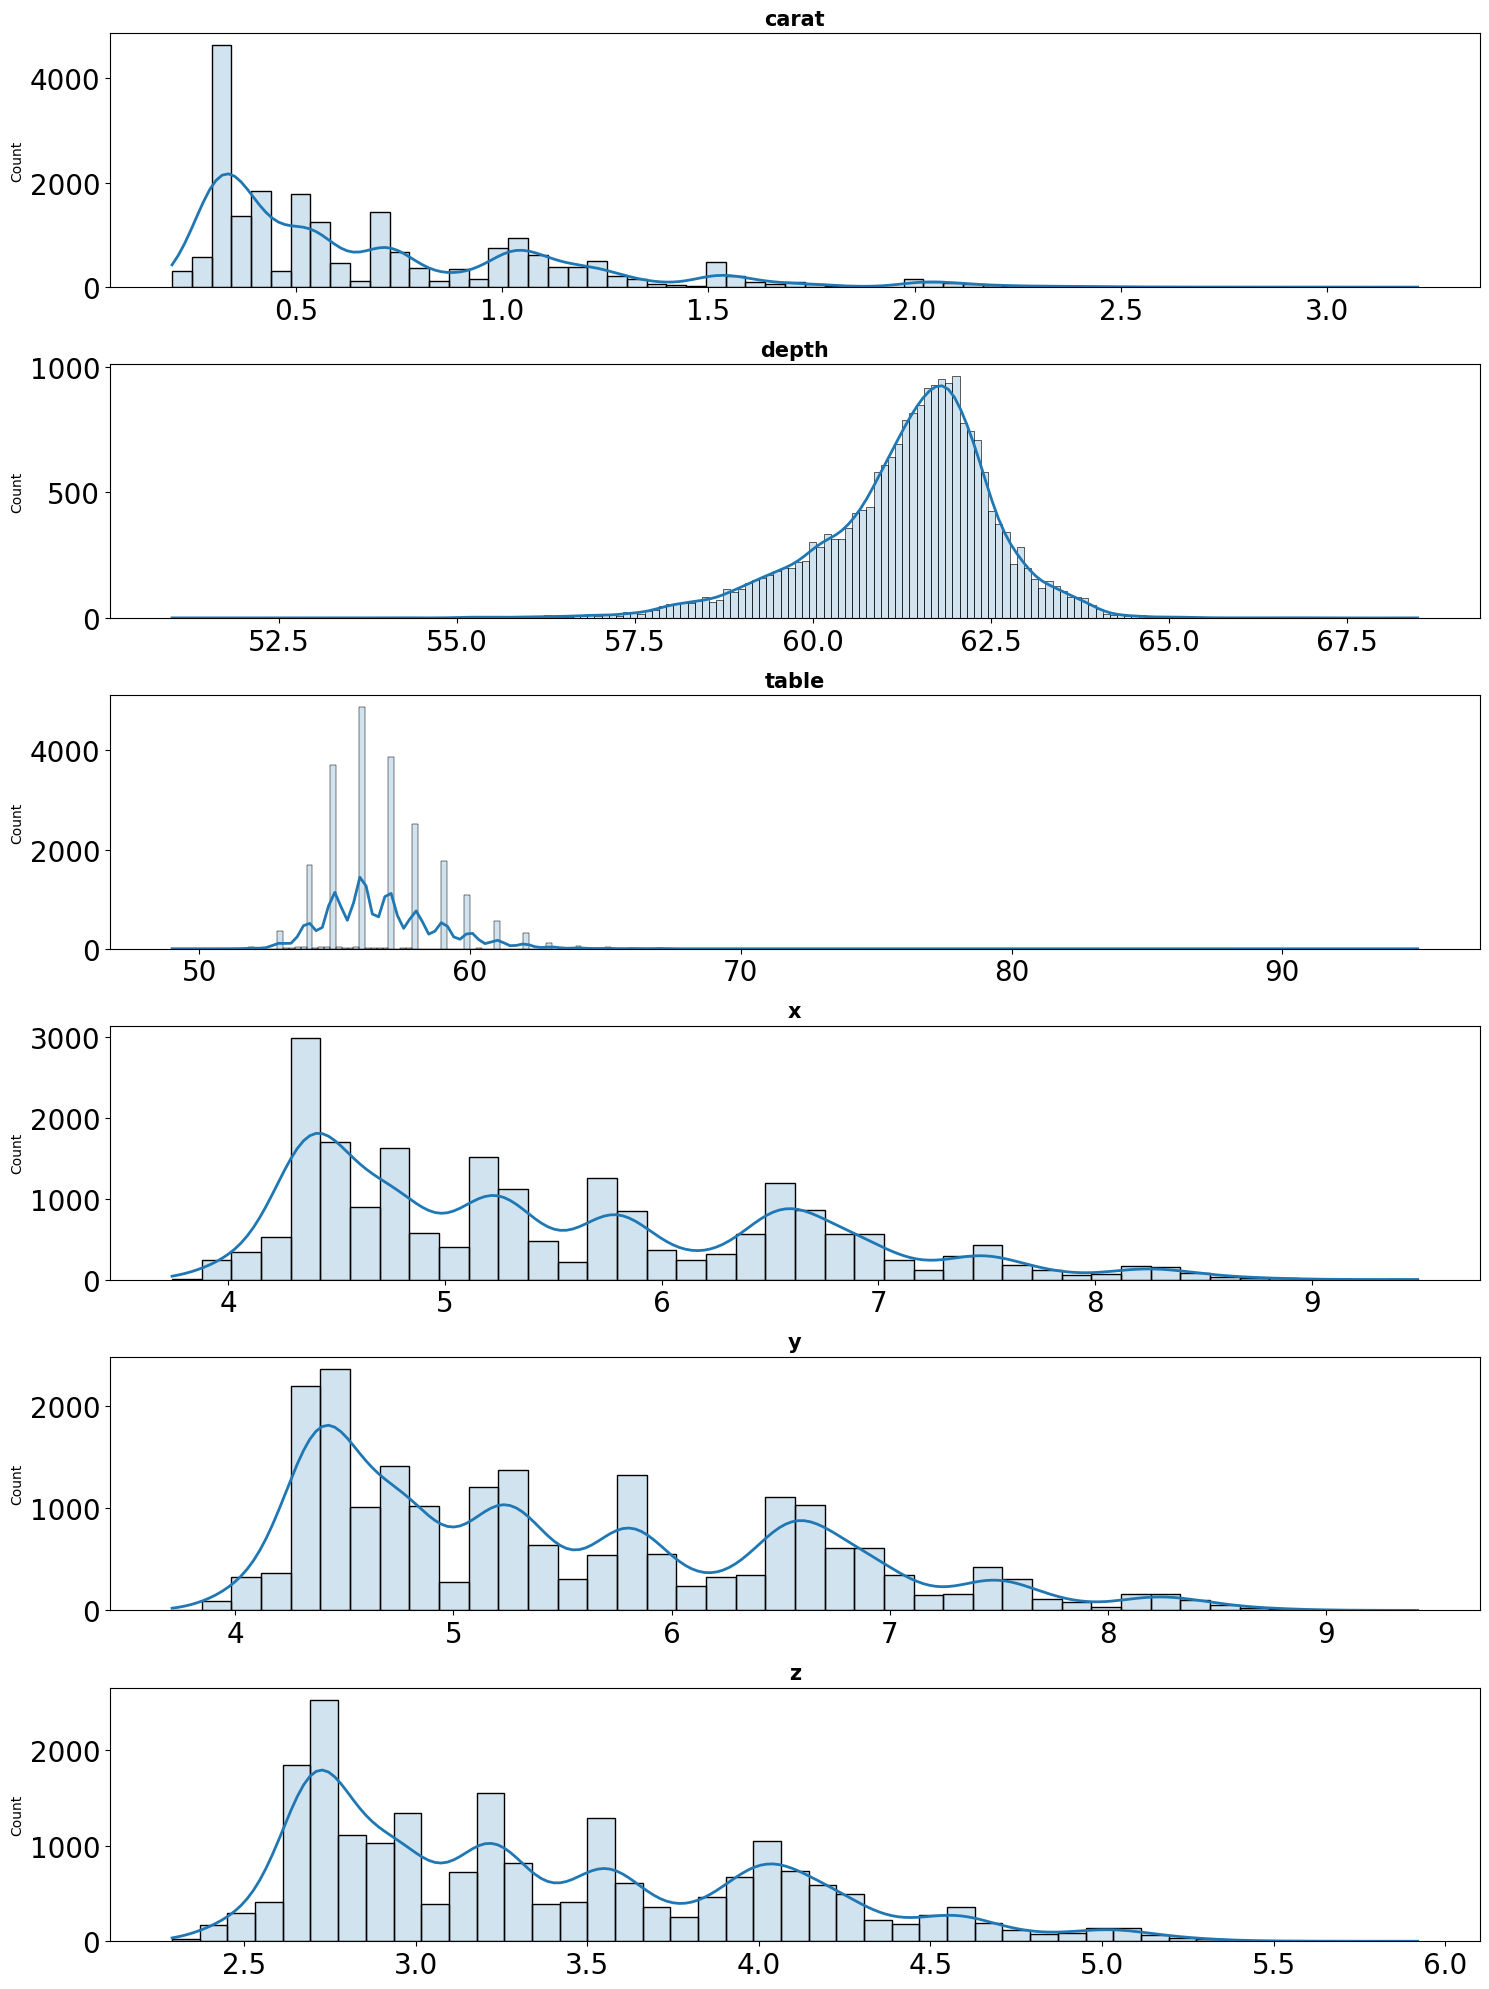

In [17]:
# Numeric variables viz:

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))

axes = axes.flat

columnas_numeric = df_train.drop(['id', 'price'], axis=1).select_dtypes(include=np.number)

for i, colum in enumerate(columnas_numeric.columns): 
    sns.histplot(
        data=columnas_numeric,
        x=colum,
        kde=True, 
        line_kws={'linewidth': 2}, 
        alpha=0.2, 
        ax=axes[i])
    
    
    axes[i].set_title(colum, fontsize=15, fontweight='bold')
    axes[i].tick_params(labelsize=20)
    axes[i].set_xlabel('')
    

fig.tight_layout();

#### Categoric:

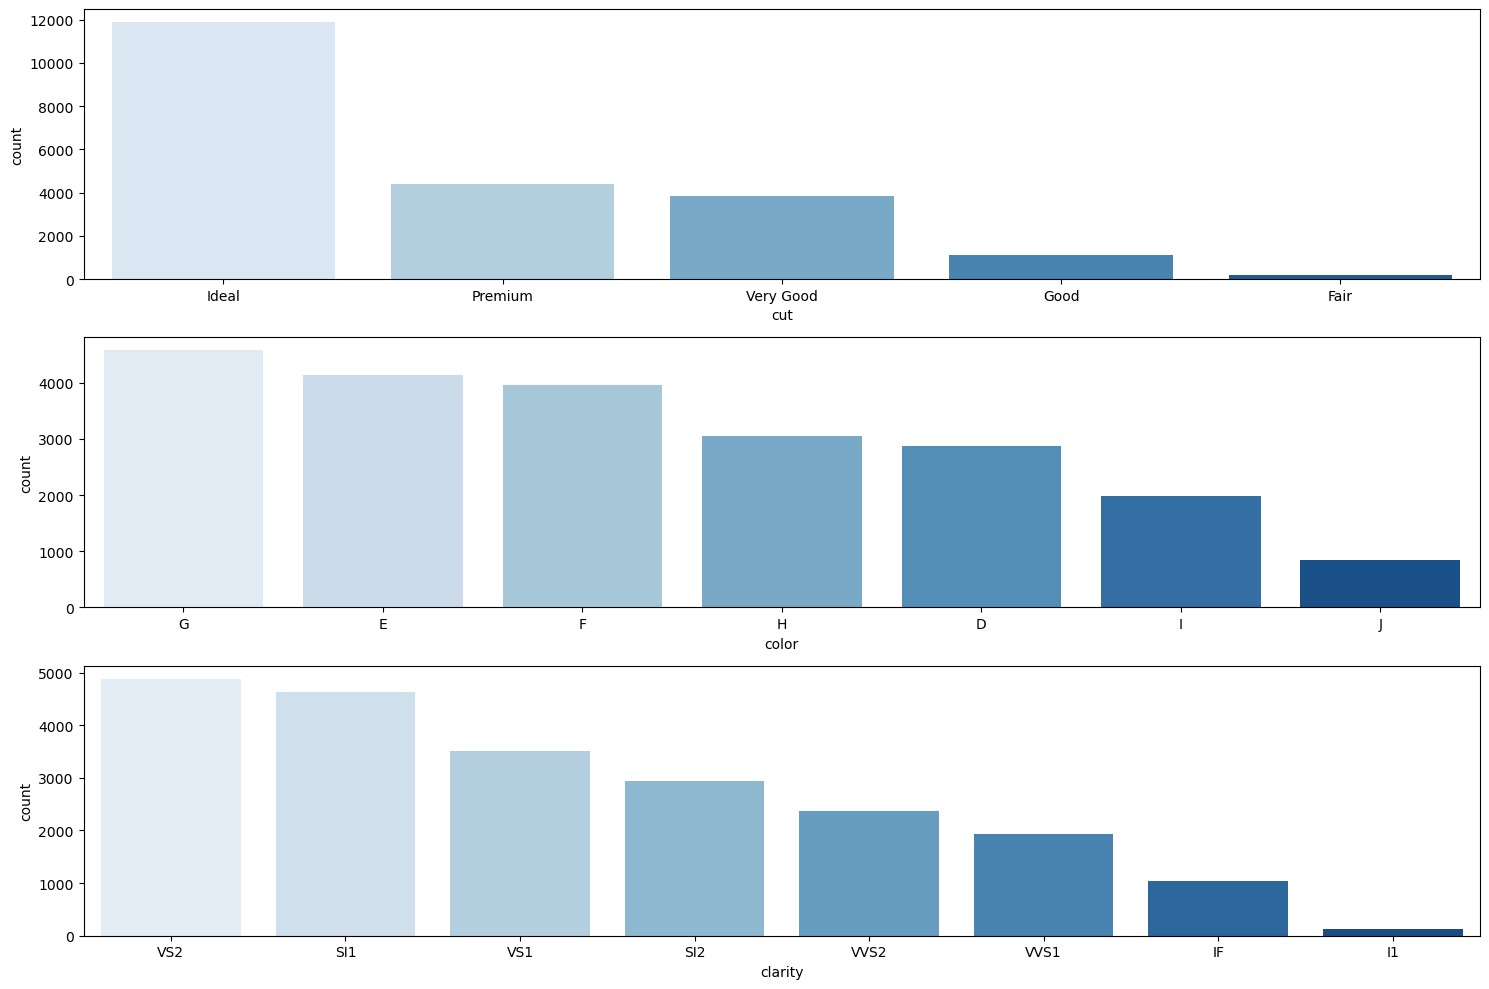

In [18]:
# Categoric variables viz:

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

axes = axes.flat

columnas_categoric = df_train.select_dtypes(include='object').columns

for i, col in enumerate(columnas_categoric):
    sns.countplot(
                x=df_train[col], 
                ax=axes[i],
                palette='Blues',
                order=df_train[col].value_counts().index)

fig.tight_layout();

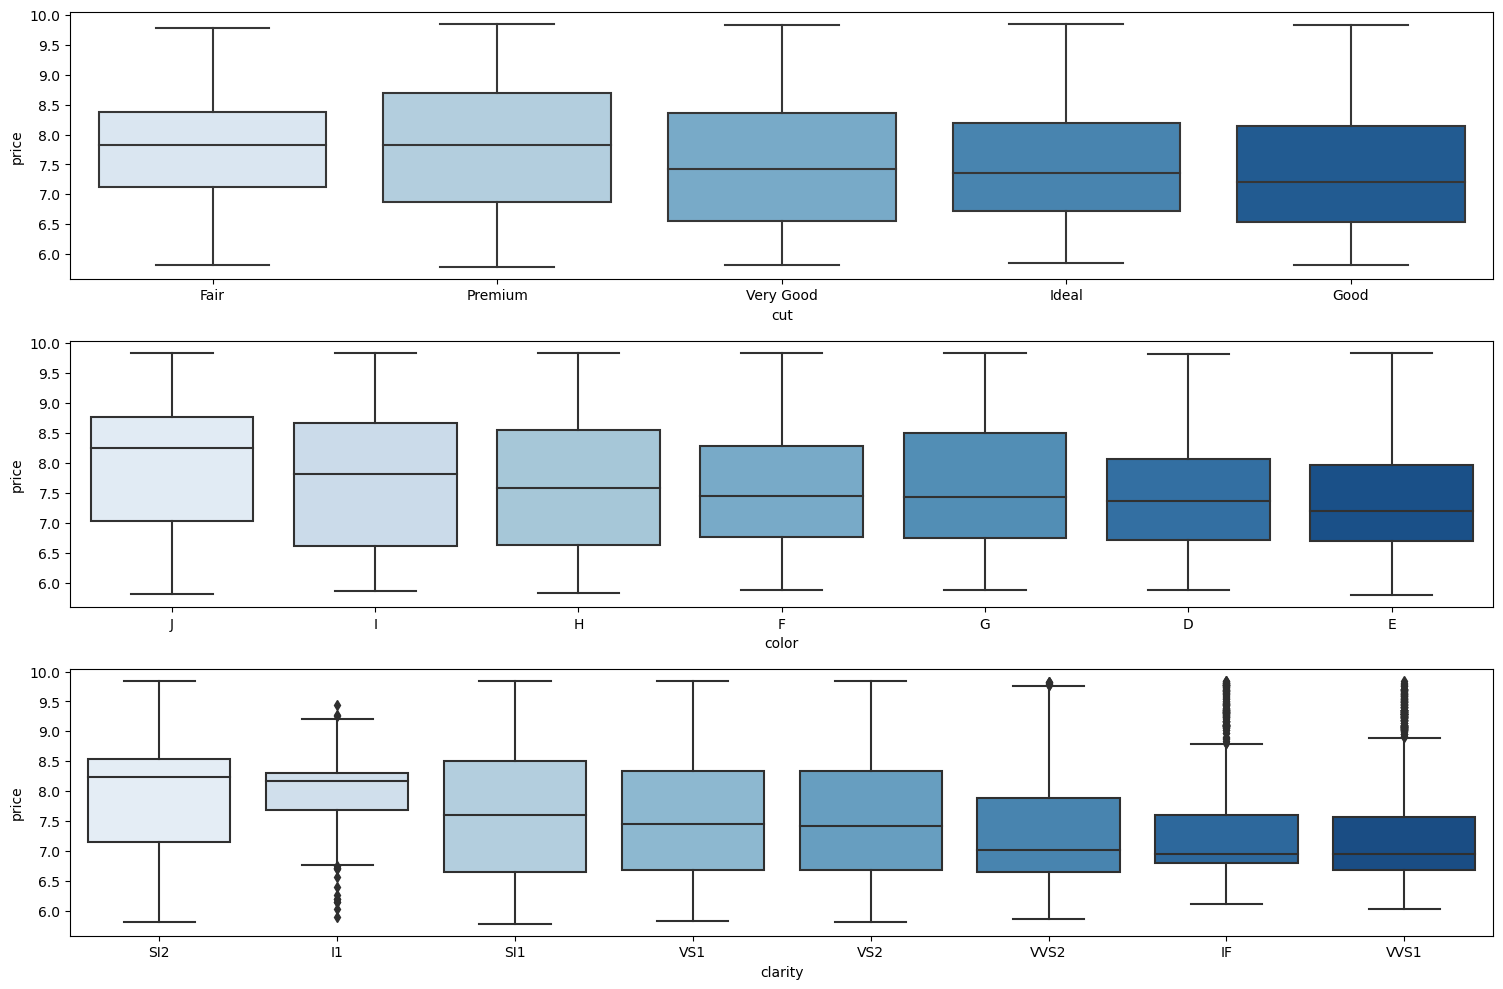

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

axes = axes.flat

columnas_categoric = df_train.select_dtypes(include='object').columns

for i, col in enumerate(columnas_categoric):

    my_order = df_train.groupby(col)['price'].median().sort_values(ascending=False).index
    sns.boxplot(
                x=df_train[col],
                y=df_train.price,
                ax=axes[i],
                palette='Blues',
                order=my_order)

fig.tight_layout();

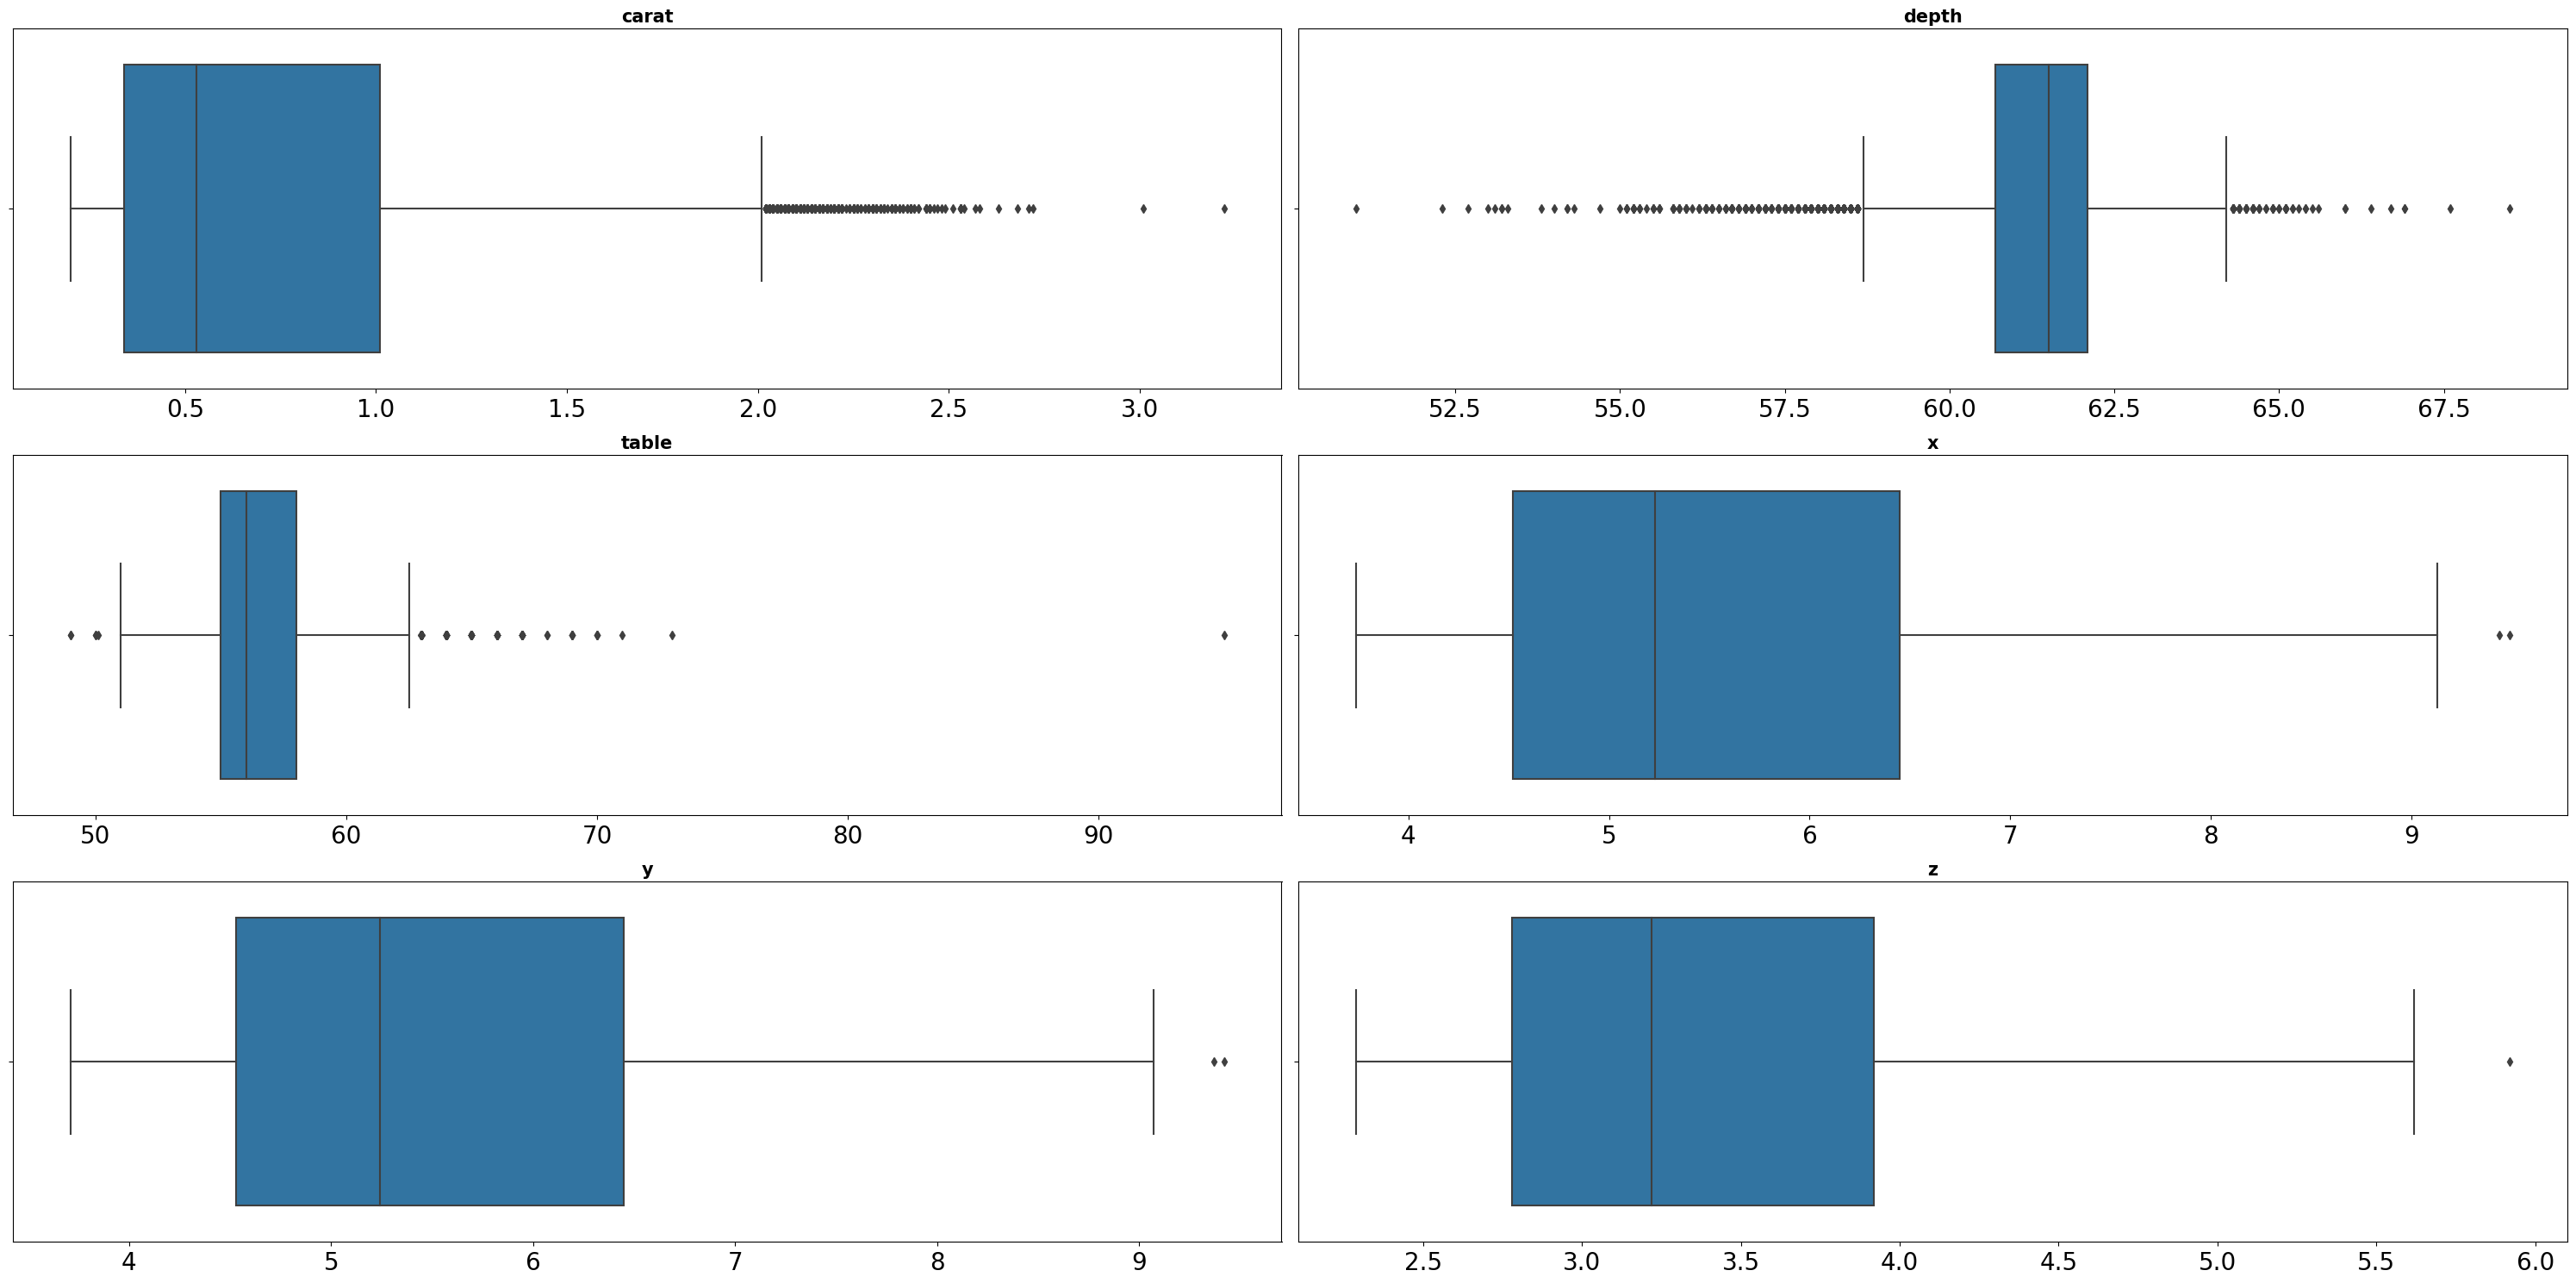

In [20]:
# Outliers in numeric cols:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))

axes = axes.flat

numeric_cols = df_train.drop(['id', 'price'], axis=1).select_dtypes(include=np.number)

for i, colum in enumerate(numeric_cols.columns): 
    sns.boxplot(
        data=df_train,
        x=colum,  
        ax=axes[i])
    
    axes[i].set_title(colum, fontsize=15, fontweight='bold')
    axes[i].tick_params(labelsize=20)
    axes[i].set_xlabel('')
    

fig.tight_layout();

In [21]:
# Counts outliers per column

def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 
    
    for col in lista_columnas:
        
        Q1 = np.nanpercentile(df_train[col], 25)
        Q3 = np.nanpercentile(df_train[col], 75)
        
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0:
        
            dicc_indices[col] = len(list(outliers_data.index)) # by removing len you get the outliers indexes for each col
        
    return dicc_indices 

ind = detectar_outliers(columnas_numeric, df_train)
ind

{'carat': 430, 'depth': 831, 'table': 261, 'x': 2, 'y': 2, 'z': 1}

In [22]:
'''valores = list(ind.values())
valores = [indice for sublista in valores for indice in sublista]
valores = set(valores)
df_train.drop(df_train.index[list(valores)], inplace=True)''';

In [23]:
'''df_train = df_train[df_train["carat"] < np.percentile(df_train["carat"], 75)]
df_train = df_train[df_train["depth"] > np.percentile(df_train["depth"], 25)]
df_train = df_train[df_train["depth"] < np.percentile(df_train["depth"], 75)]
df_train = df_train[df_train["table"] < np.percentile(df_train["table"], 75)]
df_train = df_train[df_train["table"] > np.percentile(df_train["table"], 25)]
df_train = df_train[df_train["y"] < np.percentile(df_train["y"], 75)]
df_train = df_train[df_train["z"] < np.percentile(df_train["z"], 75)]''';

In [24]:
ind = detectar_outliers(columnas_numeric, df_train)
ind

{'carat': 430, 'depth': 831, 'table': 261, 'x': 2, 'y': 2, 'z': 1}

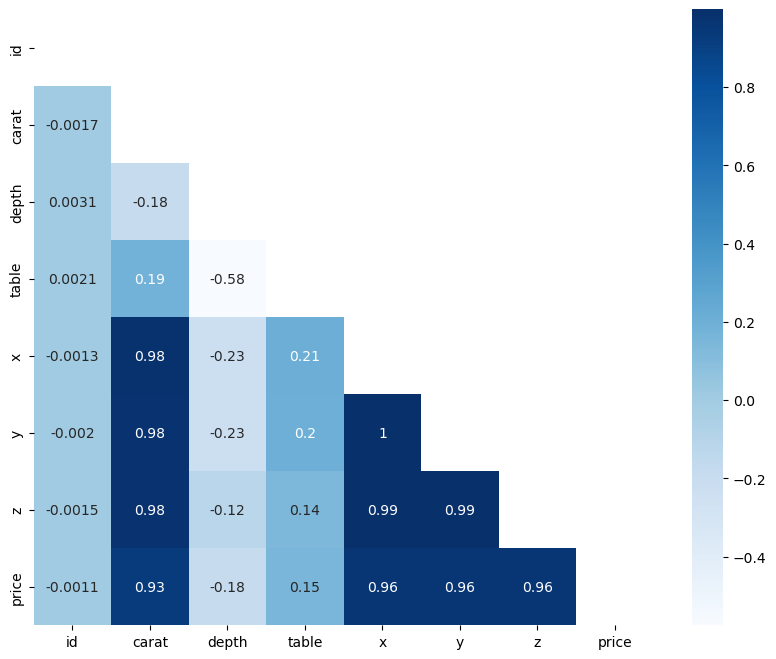

In [25]:
# Correlation matrix:

mask = np.triu(np.ones_like(df_train.corr(numeric_only=True), dtype=np.bool_))
sns.heatmap(df_train.corr(numeric_only=True), 
            cmap='Blues', 
            mask=mask,
            annot=True);

# standarization

In [26]:
df_copy = df_train.copy()

In [27]:
def standardize_numeric_data(df, cols):
    
    robust = RobustScaler()
    robust.fit(df[cols])
    
    X_robust = robust.transform(df[cols])
    df[cols] = X_robust

    return df

In [28]:
numeric_cols = df_copy.select_dtypes(include=np.number).drop(['id', 'price'], axis=1).columns
numeric_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [29]:
df_copy = standardize_numeric_data(df_copy, numeric_cols)

# encoding

In [30]:
df_copy_2= df_copy.copy()
df_copy_2.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,-0.343284,Premium,D,SI2,0.642857,0.666667,-0.476684,-0.500000,-0.473684,6.353
1,1,0.716418,Ideal,E,VVS2,0.857143,0.000000,0.616580,0.635417,0.719298,9.183
7,7,-0.298507,Ideal,E,VVS2,-1.071429,0.000000,-0.362694,-0.354167,-0.438596,6.877
8,8,-0.313433,Very Good,E,VS2,1.000000,0.000000,-0.450777,-0.442708,-0.412281,6.554
10,10,0.149254,Ideal,D,SI1,-0.285714,0.000000,0.150259,0.177083,0.149123,7.484


In [31]:
df_copy_2.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

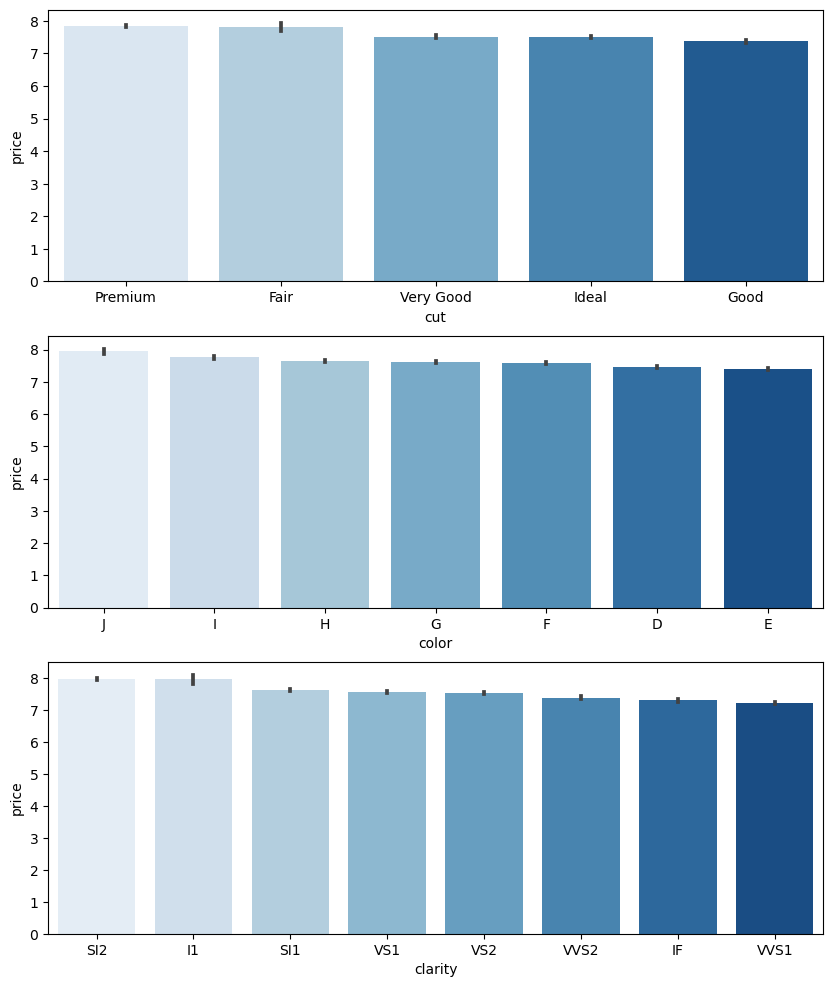

In [32]:
f, ax = plt.subplots(3, figsize=(10,12))

orden = df_train.groupby('cut')['price'].mean().sort_values(ascending=False).index
sns.barplot(x="cut", y="price", data=df_train, palette='Blues', ax=ax[0], order=orden)

orden = df_train.groupby('color')['price'].mean().sort_values(ascending=False).index
sns.barplot(x="color", y="price", data=df_train, palette='Blues', ax=ax[1], order=orden)

orden = df_train.groupby('clarity')['price'].mean().sort_values(ascending=False).index
sns.barplot(x="clarity", y="price", data=df_train, palette='Blues', ax=ax[2], order=orden)

plt.show()

In [33]:
def custom_encoder(dataframe, column_name, encoding_order):

    encoding_dict = {value: index for index, value in enumerate(encoding_order)}
    dataframe[column_name + '_encoded'] = dataframe[column_name].map(encoding_dict)
    return dataframe


In [34]:
orden = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
df_copy_2 = custom_encoder(df_copy_2, "cut", orden)

In [35]:
orden = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
df_copy_2 = custom_encoder(df_copy_2, "color", orden)

In [36]:
orden = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
df_copy_2 = custom_encoder(df_copy_2, "clarity", orden)

In [37]:
df_copy_2.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)
df_copy_2.head()

,id,carat,depth,table,x,y,z,price,cut_encoded,color_encoded,clarity_encoded
0,0,-0.343284,0.642857,0.666667,-0.476684,-0.500000,-0.473684,6.353,1,0,6
1,1,0.716418,0.857143,0.000000,0.616580,0.635417,0.719298,9.183,0,1,2
7,7,-0.298507,-1.071429,0.000000,-0.362694,-0.354167,-0.438596,6.877,0,1,2
8,8,-0.313433,1.000000,0.000000,-0.450777,-0.442708,-0.412281,6.554,2,1,4
10,10,0.149254,-0.285714,0.000000,0.150259,0.177083,0.149123,7.484,0,0,5


In [38]:
df_copy_2.isnull().sum()

id                 0
carat              0
depth              0
table              0
x                  0
y                  0
z                  0
price              0
cut_encoded        0
color_encoded      0
clarity_encoded    0
dtype: int64

In [39]:
df_copy_2.shape

(21438, 11)

In [40]:
df_copy_2.to_csv(f'../data/clean_density_{threshold}.csv', index = True, sep = ',')